<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing all the necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-11-6f69f8c56796>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [14]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('WATCHLIST.xlsx')
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",422798,1958-05-09,Alfred Hitchcock
1,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,346234,1968-12-20,Sergio Leone
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",235235,1940-10-15,Charles Chaplin
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",384311,2007-12-03,Tim Burton
4,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",440505,1984-06-07,Ivan Reitman
5,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5776,1996-08-14,Fraser C. Heston
6,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6622,1994-07-22,Daniel Petrie
7,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11585,1996-05-17,Alan Shapiro
8,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3255,1995-01-13,Phillip Borsos
9,2020-05-12,The Miles Davis Story,tvMovie,7.5,125,2001,Documentary,317,2001-04-14,Michael Dibb


In [15]:
# Displaying the number of rows and columns in the dataset:
df.shape

(864, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         864 non-null    datetime64[ns]
 1   Title           864 non-null    object        
 2   Title Type      864 non-null    object        
 3   IMDb Rating     864 non-null    float64       
 4   Runtime (mins)  864 non-null    int64         
 5   Year            864 non-null    int64         
 6   Genres          864 non-null    object        
 7   Num Votes       864 non-null    int64         
 8   Release Date    864 non-null    datetime64[ns]
 9   Directors       860 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 67.6+ KB


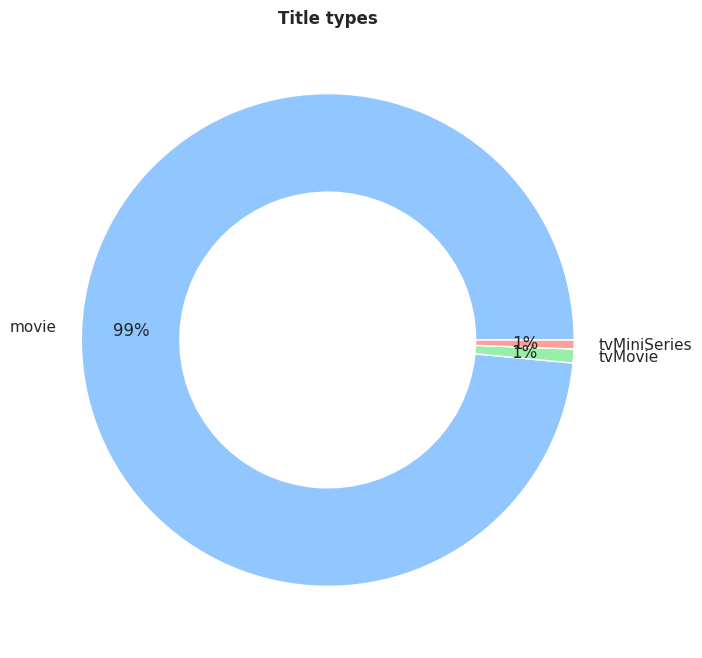

In [39]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'pie',
                                     autopct = '%.0f%%',
                                     figsize = (8, 8),
                                     wedgeprops = dict(width = 0.4),
                                     pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [40]:
# Creating a datetime object based on the dates from the dataset:
df['Created'] = df['Created'].map(pd.to_datetime)
df['Day Created'] = df['Created'].apply(lambda x : x.day)
df['Month Created'] = df['Created'].apply(lambda x : x.month)
df['Year Created'] = df['Created'].apply(lambda x : x.year)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 863
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           2413 non-null   datetime64[ns]
 1   Title             2413 non-null   object        
 2   Title Type        2413 non-null   object        
 3   IMDb Rating       2413 non-null   float64       
 4   Runtime (mins)    2413 non-null   int64         
 5   Year              2413 non-null   int64         
 6   Genres            2413 non-null   object        
 7   Num Votes         2413 non-null   int64         
 8   Release Date      2413 non-null   datetime64[ns]
 9   Directors         2399 non-null   object        
 10  Day Created       2413 non-null   int64         
 11  Month Created     2413 non-null   int64         
 12  Year Created      2413 non-null   int64         
 13  Quality           2413 non-null   object        
 14  Movie popularity  2413 no

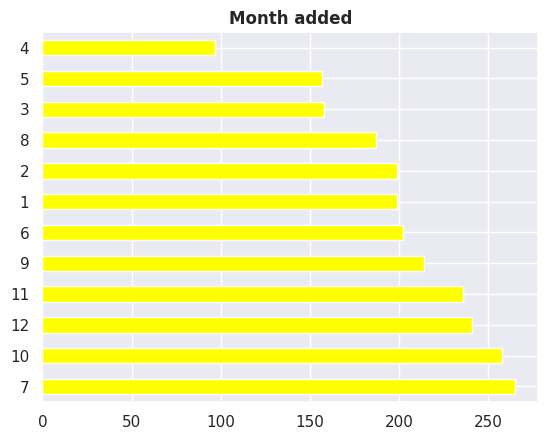

In [41]:
# Displaying distibution of months in which movies were added to the dataset:
df['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Month added', fontweight = 'bold')
plt.show()

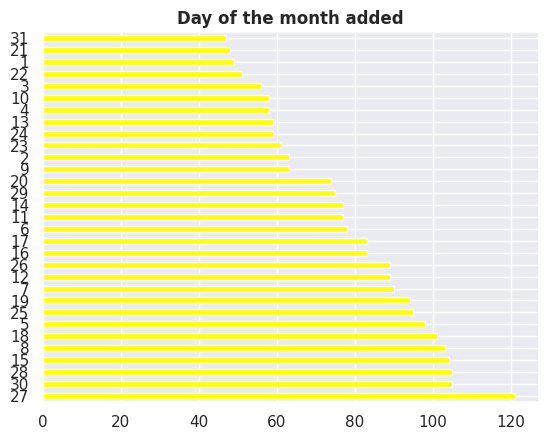

In [43]:
# Displaying distibution of days in which movies were added to the dataset:
df['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Day of the month added', fontweight = 'bold')
plt.show()

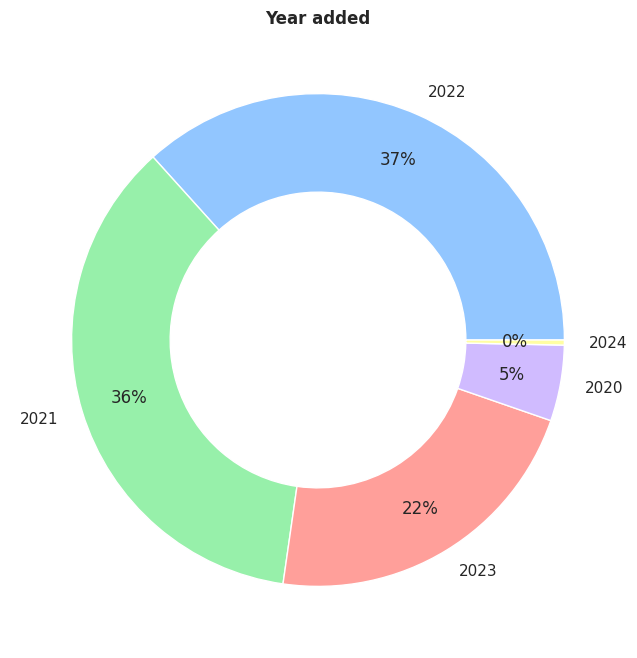

In [44]:
# Displaying distibution of years in which movies were added to the dataset:
df['Year Created'].value_counts().plot(kind = 'pie',
                                       autopct = '%.0f%%',
                                       figsize = (8, 8),
                                       wedgeprops = dict(width = 0.4),
                                       pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year added', fontweight = 'bold')
plt.show()

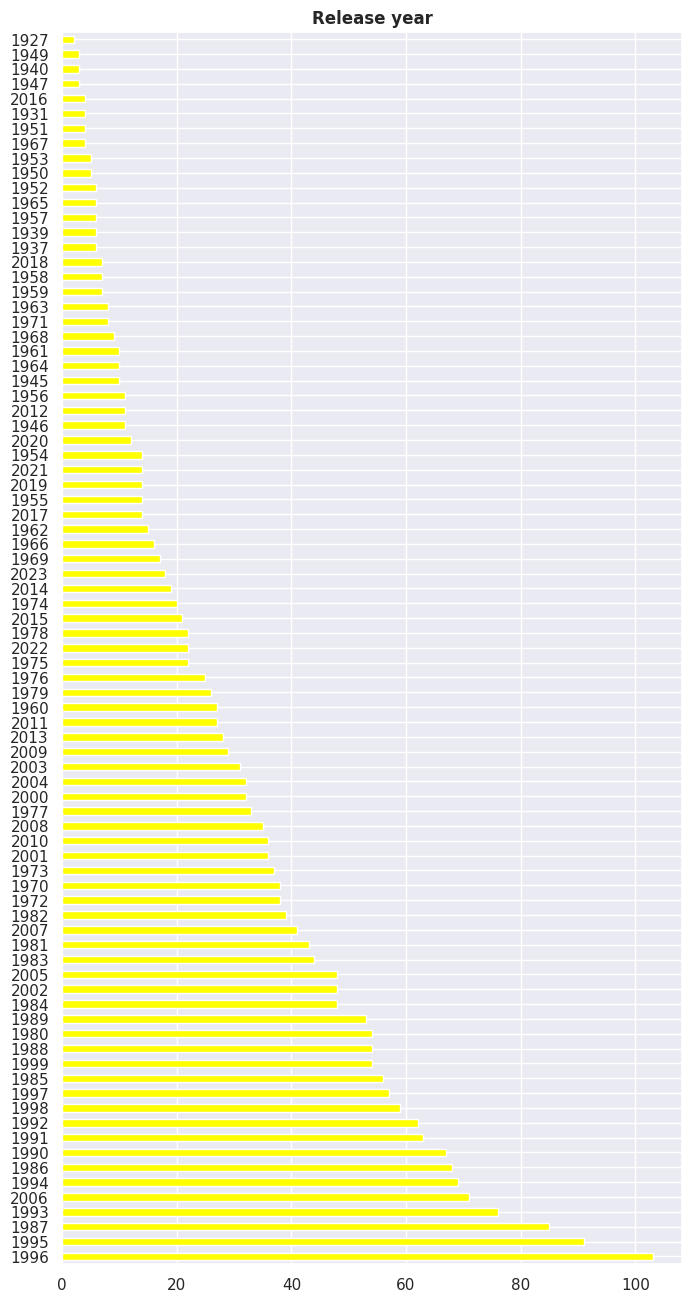

In [45]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [46]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Average'
  elif rating >= 4 and rating < 5:
    quality = 'Poor'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality,Movie popularity,Movie duration
0,2020-04-29,Vertigo,movie,8.3,128,1958,Mystery,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
0,2020-04-29,Vertigo,movie,8.3,128,1958,Romance,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
0,2020-04-29,Vertigo,movie,8.3,128,1958,Thriller,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
1,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,346234,1968-12-20,Sergio Leone,29,4,2020,Amazing,Over 250k votes,Between 2h30 and 2h59
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,Comedy,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,Drama,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,War,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Drama,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Horror,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Musical,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59


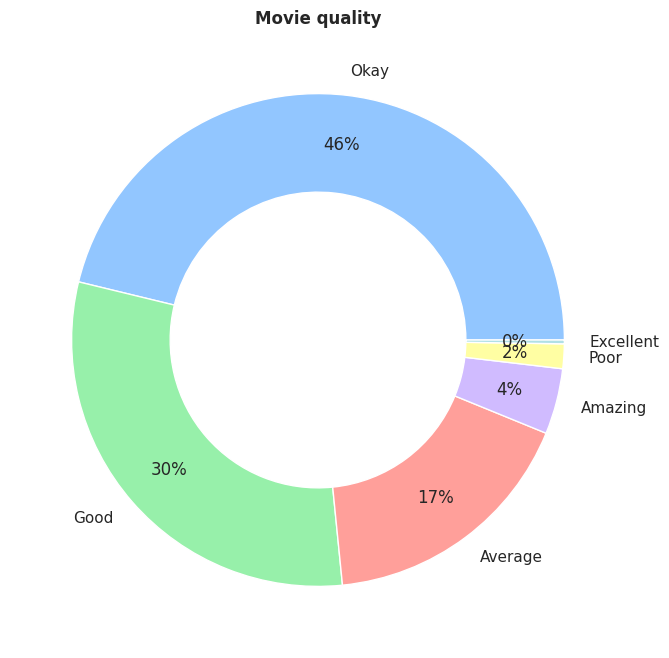

In [47]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie',
                                  autopct = '%.0f%%',
                                  figsize = (8, 8),
                                  wedgeprops = dict(width = 0.4),
                                  pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [48]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 750000 and num_votes < 1000000:
    popularity = 'Over 750k votes'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Over 100k votes'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Over 10k votes'
  else:
    popularity = 'Less than 10k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality,Movie popularity,Movie duration
0,2020-04-29,Vertigo,movie,8.3,128,1958,Mystery,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
0,2020-04-29,Vertigo,movie,8.3,128,1958,Romance,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
0,2020-04-29,Vertigo,movie,8.3,128,1958,Thriller,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
1,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,346234,1968-12-20,Sergio Leone,29,4,2020,Amazing,Over 250k votes,Between 2h30 and 2h59
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,Comedy,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,Drama,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,War,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Drama,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Horror,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Musical,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59


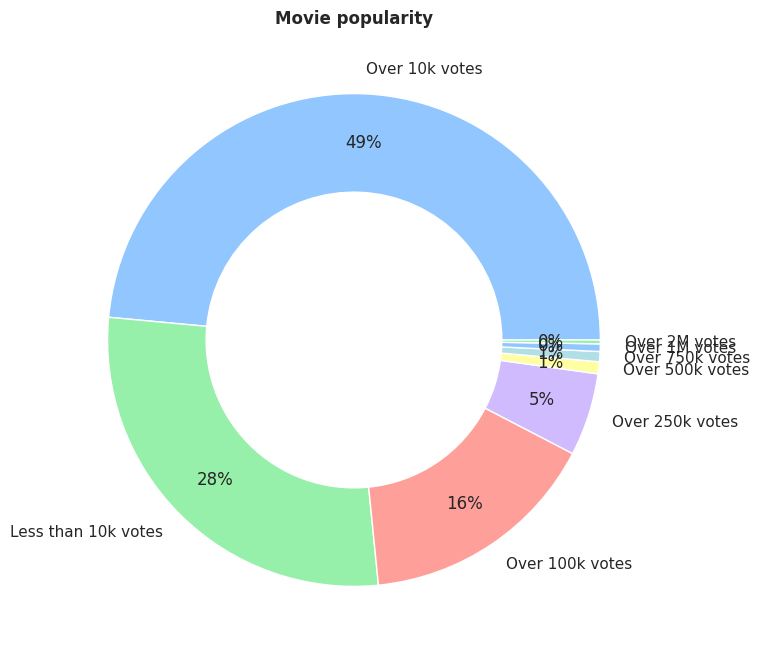

In [49]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'pie',
                                           autopct = '%.0f%%',
                                           figsize = (8, 8),
                                           wedgeprops = dict(width = 0.4),
                                           pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [50]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality,Movie popularity,Movie duration
0,2020-04-29,Vertigo,movie,8.3,128,1958,Mystery,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
0,2020-04-29,Vertigo,movie,8.3,128,1958,Romance,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
0,2020-04-29,Vertigo,movie,8.3,128,1958,Thriller,422798,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
1,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,346234,1968-12-20,Sergio Leone,29,4,2020,Amazing,Over 250k votes,Between 2h30 and 2h59
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,Comedy,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,Drama,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
2,2020-04-29,The Great Dictator,movie,8.4,125,1940,War,235235,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Drama,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Horror,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,Musical,384311,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59


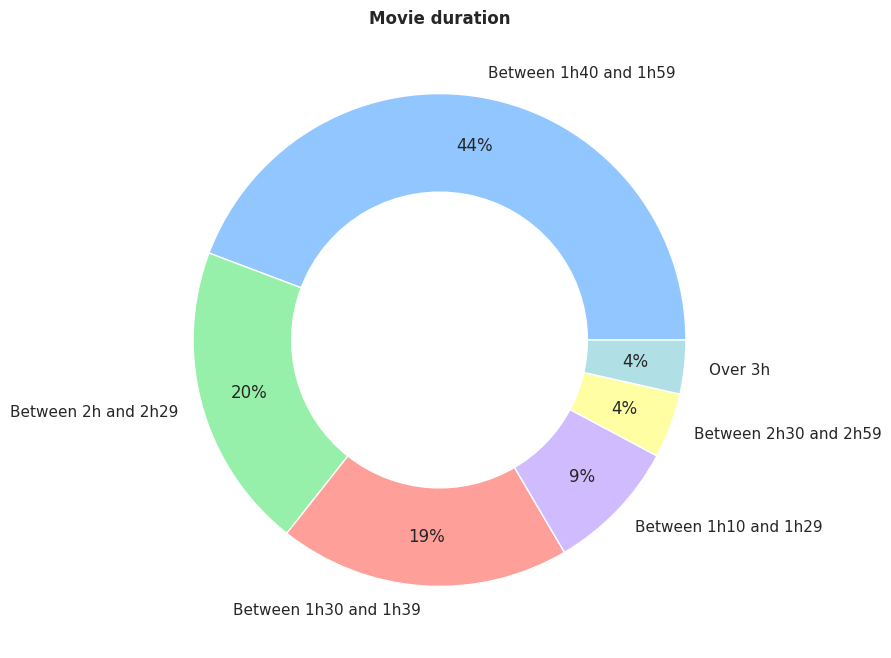

In [51]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'pie',
                                         autopct = '%.0f%%',
                                         figsize = (8, 8),
                                         wedgeprops = dict(width = 0.4),
                                         pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [52]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

In [53]:
# Splitting the genres by comma and removing leading spaces:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

In [54]:
# Exploding the list into separate rows:
df = df.explode('Genres')

In [55]:
# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = df.index, columns = df['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

In [56]:
# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [57]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         723   141
Adventure      738   126
Animation      844    20
Biography      788    76
Comedy         555   309
Crime          697   167
Documentary    858     6
Drama          267   597
Family         773    91
Fantasy        797    67
Film-Noir      859     5
History        813    51
Horror         833    31
Music          824    40
Musical        838    26
Mystery        794    70
Romance        658   206
Sci-Fi         797    67
Sport          808    56
Thriller       689   175
War            809    55
Western        833    31


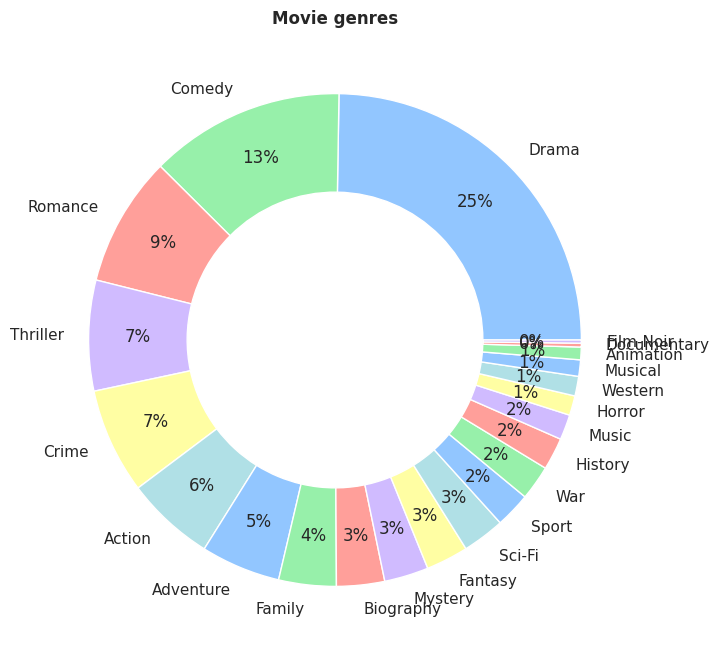

In [59]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'pie',
                                                   autopct = '%.0f%%',
                                                   figsize = (8, 8),
                                                   wedgeprops = dict(width = 0.4),
                                                   pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()